In [87]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, accumulate
import copy
import time
import networkx as nx
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import squareform



# STUDENT ID NUMBER: 2024-10297


Contributors:
2024-10413, 
2024-10390, 
2024-10295, 
2024-10303,
2024-10325,
2024-10471


# INSTRUCTIONS

1. Put your student ID number (no other identifying features).  
If collaborating, put collaborators' id numbers underneath (again, no identifying features).
1. Submit both a notebook and exported PDF of the notebook after restart-and-run-all.  
    1. Submitted notebook must run in reasonable time.
    1. Ensure the exported pdf is LaTex formatted. 
1. No formal written section, but if your algorithm has an explicit recurrence relation, justify its usage in a separate typeset pdf.
1. For the coding section:
    1. Limit code answers to the designated spaces in functions (marked off by "###") and cells (marked by "### DO: *\<instructions\>*").  
       You may add extra cells to run subroutines (in order), but only marked cells will be graded. 
    1. Do not change the provided cells, or their order.  
       Any detected alterations will zero out that section. 
       
### Tips
- You are encouraged to work either alone or with your official partner, but not more.  
- For the coding section, test and sanity-check your work extensively.  
- For written questions on the coding exercises, if you really understand the solution, the answer should fit in 1-3 sentences.  

# Coding [$4 \times 25 = 100$ pts]

## Ex. 1 - Linear Partition

See Section 8.5 of Skiena


In [88]:
### DO: Make a function that takes in nonnegative array A, and integer k. 
### Return the partition into k or fewer ranges to minimize the maximum sum over all ranges without reordering.  

def partition_function(a, k): 
    l = max(a) 
    r = sum(a) + 1 

    def grouping(max_sum): 
        sum_of_group = 0 
        num_group = 1 

        for i in a: 
            if sum_of_group + i <= max_sum:
                sum_of_group += i
            else:
                sum_of_group = i 
                num_group += 1 
        return num_group

    while l < r: 
        mid = (l + r) // 2 
        if grouping(mid) > k:
            l = mid + 1 
        else: 
            r = mid  

    partitions = []
    current = []
    total = 0
    remaining_parts = k

    for i in reversed(a):  
        if total + i > l or len(a) - len(partitions) < remaining_parts:
            partitions.append(current[::-1])
            current = [i]
            total = i
            remaining_parts -= 1
        else:
            current.append(i)
            total += i
    partitions.append(current[::-1]) 
    partitions = partitions[::-1] 

    return partitions
        
EX1_TEST_1 = [1,2,3,4,5,6,7,8,9]
print(f"TEST ARRAY 1: {EX1_TEST_1}")
parititoned_list = partition_function(EX1_TEST_1,2)

for partition in parititoned_list:
    print(f"{partition} SUM:{sum(partition)}")

print()

EX1_TEST_2 = [1,9,2,8,3,7,4,6]
print(f"TEST ARRAY 2: {EX1_TEST_2}")
parititoned_list = partition_function(EX1_TEST_2,2)

for partition in parititoned_list:
    print(f"{partition} SUM:{sum(partition)}")


TEST ARRAY 1: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6] SUM:21
[7, 8, 9] SUM:24

TEST ARRAY 2: [1, 9, 2, 8, 3, 7, 4, 6]
[1, 9, 2, 8] SUM:20
[3, 7, 4, 6] SUM:20


In [89]:
def brutforce_linear_partition(A, k):
    n = len(A)
    min_max_sum = float('inf')
    optimal_partition_found = [] 

    # Edge cases
    if n == 0:
        return []
    if k <= 0:
        return []
    if k >= n:
        pass

    def find_partitions(index, current_partition, num_partitions_made):
        nonlocal min_max_sum, optimal_partition_found

        if index == n:
            if 1 <= num_partitions_made <= k:
                current_max_sum = 0
                for segment in current_partition:
                    current_max_sum = max(current_max_sum, sum(segment))

                if current_max_sum < min_max_sum: 
                    min_max_sum = current_max_sum
                    optimal_partition_found = copy.deepcopy(current_partition) 

            return

        if current_partition:
            current_partition[-1].append(A[index])
            find_partitions(index + 1, current_partition, num_partitions_made)
            current_partition[-1].pop() 
        if num_partitions_made < k:
            find_partitions(index + 1, current_partition + [[A[index]]], num_partitions_made + 1)


    find_partitions(1, [[A[0]]], 1)

    return optimal_partition_found

EX1_TEST_1 = [1,2,3,4,5,6,7,8,9]
EX1_TEST_2 = [1,9,2,8,3,7,4,6]
print(brutforce_linear_partition(EX1_TEST_1, 2))
print(brutforce_linear_partition(EX1_TEST_2, 2))

[[1, 2, 3, 4, 5, 6], [7, 8, 9]]
[[1, 9, 2, 8], [3, 7, 4, 6]]


In [90]:
### DO: Prove your code works.
EX1_Tests = 20
k = 3

for i in range(5, EX1_Tests+1):
    EX1_ARRAY_TEST = np.random.randint(1,51, size=i)
    EX1_ARRAY_TEST = EX1_ARRAY_TEST.tolist()

    print(f"TEST CASE ARRAY SIZE: {i}")
    print(EX1_ARRAY_TEST)
    EX1_TEST_PARITIONED = partition_function(EX1_ARRAY_TEST, k)

    for partition in EX1_TEST_PARITIONED:
        print(str(partition).rjust(15), 'SUM:'.rjust(5), str(sum(partition)).ljust(4))
    print()

TEST CASE ARRAY SIZE: 5
[1, 7, 29, 6, 46]
  [1, 7, 29, 6]  SUM: 43  
           [46]  SUM: 46  

TEST CASE ARRAY SIZE: 6
[18, 7, 48, 34, 4, 17]
           [18]  SUM: 18  
        [7, 48]  SUM: 55  
    [34, 4, 17]  SUM: 55  

TEST CASE ARRAY SIZE: 7
[22, 24, 37, 42, 37, 44, 21]
   [22, 24, 37]  SUM: 83  
       [42, 37]  SUM: 79  
       [44, 21]  SUM: 65  

TEST CASE ARRAY SIZE: 8
[20, 23, 44, 44, 41, 43, 43, 6]
   [20, 23, 44]  SUM: 87  
       [44, 41]  SUM: 85  
    [43, 43, 6]  SUM: 92  

TEST CASE ARRAY SIZE: 9
[40, 20, 32, 18, 39, 9, 38, 12, 26]
       [40, 20]  SUM: 60  
   [32, 18, 39]  SUM: 89  
[9, 38, 12, 26]  SUM: 85  

TEST CASE ARRAY SIZE: 10
[9, 16, 8, 35, 18, 1, 5, 11, 47, 49]
 [9, 16, 8, 35]  SUM: 68  
[18, 1, 5, 11, 47]  SUM: 82  
           [49]  SUM: 49  

TEST CASE ARRAY SIZE: 11
[41, 15, 38, 17, 23, 50, 22, 48, 11, 24, 24]
[41, 15, 38, 17]  SUM: 111 
   [23, 50, 22]  SUM: 95  
[48, 11, 24, 24]  SUM: 107 

TEST CASE ARRAY SIZE: 12
[20, 37, 22, 2, 26, 15, 8, 24, 39

## Ex. 2 - Max Sum Path

Source: [Project Euler](https://projecteuler.net/problem=18)

Play the following game: 

Make a Pascal triangle of height $N$, where the entries are random integers between 0 and 100.  
Starting from the top, make a path by choosing any adjacent elements in the row below.  
Do this until you reach the bottom, and add them up - this makes the *path sum*. 

Find the maximum path sum for a given triangle by dynamic programming. 

In [91]:
### DO: Generate a Pascal triangle arrangement of height N, but filled with random integers between 0 and 100. 

N = 5
def make_triangle(height):
    triangle = []
    for i in range(height):
        zeros = height-i 
        array = np.random.randint(0,101, size=i+1)
        while zeros > 1:
            array = np.append(array, 0)
            zeros-=1
        current_list = array.tolist()
        triangle.append(current_list)
    return triangle

test_triangle = make_triangle(N)
for row in test_triangle:
    print(row)



[9, 0, 0, 0, 0]
[55, 83, 0, 0, 0]
[64, 70, 75, 0, 0]
[19, 46, 10, 22, 0]
[12, 88, 79, 68, 29]


In [92]:
#Brute Force Solution:
#Get all possible Paths and Calculate

def get_paths(N):
    #Get All paths downward the triangle
    path = product([0,1], repeat=N-1)
    for i in path:
        path_list = enumerate([0,*accumulate(i)])
        yield list(path_list)
        
def path_sum(tri, path):
    return sum(tri[r][n] for r,n in path)

def brute_force_longest_path(tri):
    height = len(tri)
    return max(path_sum(tri,p) for p in get_paths(height))

print(f"The Max Sum is: {brute_force_longest_path(test_triangle)}")


The Max Sum is: 296


In [93]:
### DO: Find the max sum path for a triangle

#Dyncamic Programming Approach
test_triangle_sub = make_triangle(N)

def max_path_sum(tri, m, n):
    
    temporary_triangle = copy.deepcopy(tri)

    for i in range(m-1, -1, -1):
        for j in range(i+1):

            # for each element, check elements underneath and to the right and find the maximum
            if (temporary_triangle[i+1][j] > temporary_triangle[i+1][j+1]):
                temporary_triangle[i][j] += temporary_triangle[i+1][j]
            else:
                temporary_triangle[i][j] += temporary_triangle[i+1][j+1]
    
    # return the top element which has the maximum sum
    return temporary_triangle[0][0]

print(f"The Max Sum is: {max_path_sum(test_triangle, N-1, N-1)}")

The Max Sum is: 296


In [94]:
# CROSS TEST BRUTE FORCE AND DYNAMIC PROGRAMMING

test_cases = 20
print('   N | Brute Force | Dynamic Programming')
for i in range(1,test_cases+1):
    curret_test = make_triangle(i)
    Brute_Force_Result = brute_force_longest_path(curret_test)
    Dyanmic_Programming_Result = max_path_sum(curret_test, i-1, i-1)

    print(str(i).rjust(4), '|', str(Brute_Force_Result).rjust(11) ,'|', str(Dyanmic_Programming_Result).rjust(19))



   N | Brute Force | Dynamic Programming
   1 |          35 |                  35
   2 |         121 |                 121
   3 |         162 |                 162
   4 |         299 |                 299
   5 |         403 |                 403
   6 |         296 |                 296
   7 |         410 |                 410
   8 |         515 |                 515
   9 |         528 |                 528
  10 |         594 |                 594
  11 |         786 |                 786
  12 |         892 |                 892
  13 |         863 |                 863
  14 |        1021 |                1021
  15 |        1088 |                1088
  16 |        1039 |                1039
  17 |        1149 |                1149
  18 |        1177 |                1177
  19 |        1219 |                1219
  20 |        1375 |                1375


In [95]:
### DO: Prove it works to at least N = 100

N_100 = 100
print('   N |    Time   | Function')
for i in range(1,N_100+1):
    start = time.time()
    temp = make_triangle(i)
    curret_test_value = max_path_sum(temp, i-1, i-1)
    end = time.time()
    print(str(i).rjust(4), '|', str(np.round(end - start, 6)).rjust(9), '|', str(curret_test_value))

   N |    Time   | Function
   1 |       0.0 | 49
   2 |  0.015232 | 58
   3 |       0.0 | 214
   4 |       0.0 | 226
   5 |       0.0 | 403
   6 |       0.0 | 470
   7 |  0.001139 | 574
   8 |       0.0 | 458
   9 |       0.0 | 610
  10 |       0.0 | 637
  11 |       0.0 | 713
  12 |       0.0 | 804
  13 |       0.0 | 868
  14 |       0.0 | 986
  15 |       0.0 | 1104
  16 |  0.001625 | 1144
  17 |       0.0 | 1313
  18 |       0.0 | 1184
  19 |  0.001204 | 1418
  20 |       0.0 | 1384
  21 |  0.002653 | 1499
  22 |  0.000479 | 1576
  23 |       0.0 | 1703
  24 |       0.0 | 1642
  25 |       0.0 | 1778
  26 |       0.0 | 1903
  27 |       0.0 | 1917
  28 |       0.0 | 2035
  29 |       0.0 | 2162
  30 |       0.0 | 2093
  31 |  0.009763 | 2374
  32 |       0.0 | 2349
  33 |   0.00445 | 2555
  34 |  0.001787 | 2578
  35 |  0.000352 | 2532
  36 |       0.0 | 2499
  37 |       0.0 | 2631
  38 |       0.0 | 2681
  39 |       0.0 | 2866
  40 |       0.0 | 2872
  41 |  0.012345 | 3053
  42

## Ex. 3 -  Dynamic Programming for Dynamics  

Consider 2 points $(x_1, y_1)$ and $(x_2, y_2)$ where $x_1 < x_2$ and $y_1> y_2$.  
Let a ball of mass $m$ move from the higher point to the lower point under the influence of a gravitational field.  
Find the trajectory that minimizes the travel time by dynamic programming.  



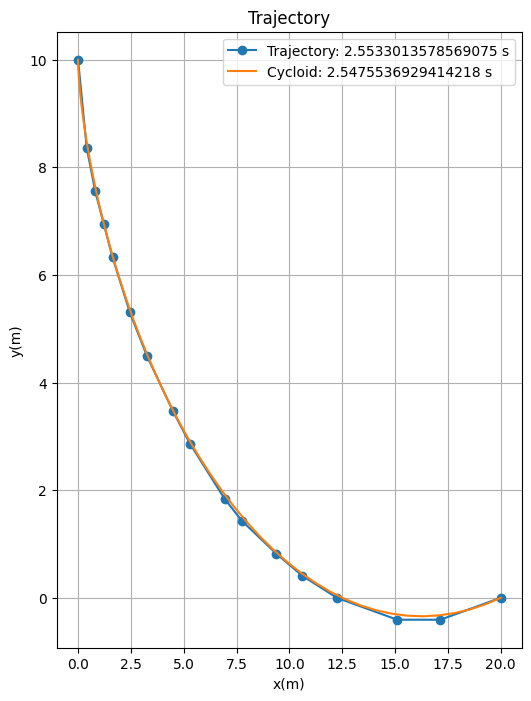

In [96]:
### DO: Find and plot the trajectory described above via dynamic programming. 
### Compare it to the theoretically optimal trajectory.

# Basic setup
N = 50
G = 9.81  

### DO: Find and plot the trajectory described above via dynamic programming. 
### Compare it to the theoretically optimal trajectory.
def computeTime(x1, y1, x2, y2, y0):  # computeTime from A to B
    if y1 > y0 or y2 > y0:
        return np.inf
        
    v1 = np.sqrt(2*G*(y0-y1))
    v2 = np.sqrt(2*G*(y0-y2))
    distance = np.sqrt((x1-x2)**2+(y1-y2)**2)
    ave_vel = (v1+v2)/2

    if ave_vel <= 0:
        return np.inf

    computeTime = distance/ave_vel
    return computeTime

def DP(x1,y1,x2,y2):
    k = x2/y1
    xSpace = np.linspace(x1, x2, N)
    ySpace = np.concatenate([np.linspace(y1, y2, N), np.linspace(y2,-y1*k,N)[1:]])

    # Initialize DP tables
    T = np.full((len(xSpace), len(ySpace)), np.inf)
    prev = np.full((len(xSpace), len(ySpace), 2), -1, dtype=int)  # to store backpointers

    T[0][0] = 0  # Start at top-left

    # DP: compute shortest computeTime to each point
    for i in range(1, len(xSpace)):
        for j in range(len(ySpace)):
            for k in range(i):
                for l in range(len(ySpace)):
                    try:
                        t_seg = computeTime(xSpace[k], ySpace[l], xSpace[i], ySpace[j], 10)
                        if T[k][l] + t_seg < T[i][j]:
                            T[i][j] = T[k][l] + t_seg
                            prev[i][j] = [k, l]
                    except:
                        continue  # skip invalid sqrt (e.g., if y2 > y0)

    # Find the endpoint with minimum computeTime in last column
    end_col = N - 1
    end_row = N - 1
    min_computeTime = T[end_col][end_row]

    i, j = end_col, end_row

    # Backtrack to recover the path
    path = []
    while (i >= 0 and j >= 0):
        path.append((xSpace[i], ySpace[j]))
        k, l = prev[i][j]
        if k == -1:
            break
        i, j = k, l

    path = path[::-1]  # reverse to get path from start to end

    x_path, y_path = zip(*path) 

    return x_path, y_path, min_computeTime

def brachistochrone_cycloid(x1, y1, x2, y2):
    """
    Returns cycloid (x, y) points from (x1, y1) to (x2, y2)
    """
    def endpoint_error(theta2):
        r = (x2 - x1) / (theta2 - np.sin(theta2))
        y_calc = y1 - r * (1 - np.cos(theta2))
        return y_calc - y2

    from scipy.optimize import fsolve

    theta2 = fsolve(endpoint_error, np.pi)[0]
    r = (x2 - x1) / (theta2 - np.sin(theta2))
    theta = np.linspace(0, theta2, N)

    x = x1 + r * (theta - np.sin(theta))
    y = y1 - r * (1 - np.cos(theta))

    time = 0
    for i in range(len(x)-1):
        time += computeTime(x[i],y[i],x[i+1],y[i+1],y1)

    return x, y, time

x1,x2,y1,y2 = 0,20,10,0
x_path, y_path, min_time = DP(x1,y1,x2,y2)
cycloid_x, cycloid_y, cycloid_time = brachistochrone_cycloid(x1,y1,x2,y2)

plt.figure(figsize=(6, 8))
plt.plot(x_path, y_path, 'o-', label='Trajectory: {} s'.format(min_time))
plt.plot(cycloid_x, cycloid_y, label='Cycloid: {} s'.format(cycloid_time))
plt.title('Trajectory')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.legend()
plt.grid(True)
plt.show()

    

## Ex. 4 - Eggplant Edits

The name "eggplant" is apparently from the white color of (some) species of eggplant, at least in American English.  
In other parts of the world, it is known by other (anglicized) names like "aubergine," "brinjal," and "berenjena."   
It is [hypothesized](https://www.youtube.com/watch?v=mQoNAR1um_c) that these names are all related to each other as loanwords, corruptions, or mutations of each other.  

Find a list of at least 10 (anglicized) names for eggplant in other languages.  
Calculate the Levenshtein edit distance between all pairs by dynamic programming.  
Construct the MST and compare this to the historical/geographical relationships between countries. 

In [97]:
### DO: Make a list L of at least 10 anglicized names for egpplant. 

L = ["badenjan", 
     "vangi", 
     "begun", 
     "beringela",
     "eggplant",
     "albergina",
     "melitzana",
     "melongena",
     "patlijan",
     "aubergine"]

In [98]:
### DO: Make a function to calculate the Levenshtein edit distance and calculate it for all the pairs. 

def lev_rec(s ,t): 
    if len(s) == 0:
        return len(t)
    if len(t) == 0:
        return len(s)
        
    if s[-1] == t[-1]:
        return lev_rec(s[:-1], t[:-1])
    else:
        return 1+min([
                    lev_rec(s[:-1], t), 
                    lev_rec(s, t[:-1]),
                    lev_rec(s[:-1], t[:-1])
                    ])

for name in L:
    current_name_lev_dist = []
    for i in range(10):
        current_name_lev_dist.append(lev_rec(name, L[i]))
    print((name).rjust(10), ":",  str(current_name_lev_dist).rjust(2))

  badenjan : [0, 6, 5, 7, 7, 7, 7, 7, 4, 7]
     vangi : [6, 0, 5, 7, 7, 7, 8, 7, 6, 7]
     begun : [5, 5, 0, 6, 6, 5, 7, 6, 7, 5]
 beringela : [7, 7, 6, 0, 7, 6, 6, 4, 9, 6]
  eggplant : [7, 7, 6, 7, 0, 8, 6, 7, 7, 8]
 albergina : [7, 7, 5, 6, 8, 0, 7, 6, 8, 2]
 melitzana : [7, 8, 7, 6, 6, 7, 0, 4, 6, 8]
 melongena : [7, 7, 6, 4, 7, 6, 4, 0, 8, 7]
  patlijan : [4, 6, 7, 9, 7, 8, 6, 8, 0, 8]
 aubergine : [7, 7, 5, 6, 8, 2, 8, 7, 8, 0]


           badenjan vangi    begun    beringela eggplant albergina melitzana melongena patlijan aubergine
badenjan  0         6         5         7         7         7         7         7         4         7         
vangi     6         0         5         7         7         7         8         7         6         7         
begun     5         5         0         6         6         5         7         6         7         5         
beringela 7         7         6         0         7         6         6         4         9         6         
eggplant  7         7         6         7         0         8         6         7         7         8         
albergina 7         7         5         6         8         0         7         6         8         2         
melitzana 7         8         7         6         6         7         0         4         6         8         
melongena 7         7         6         4         7         6         4         0         8         7         
patlij

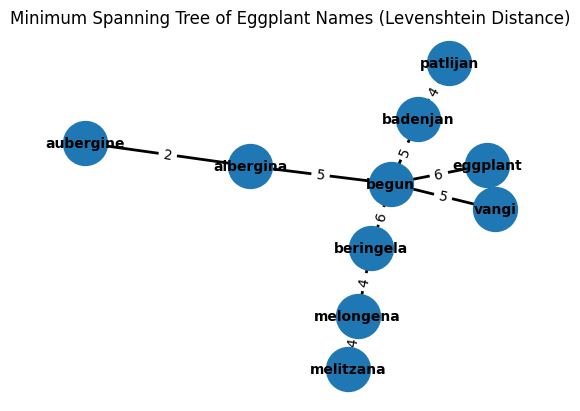

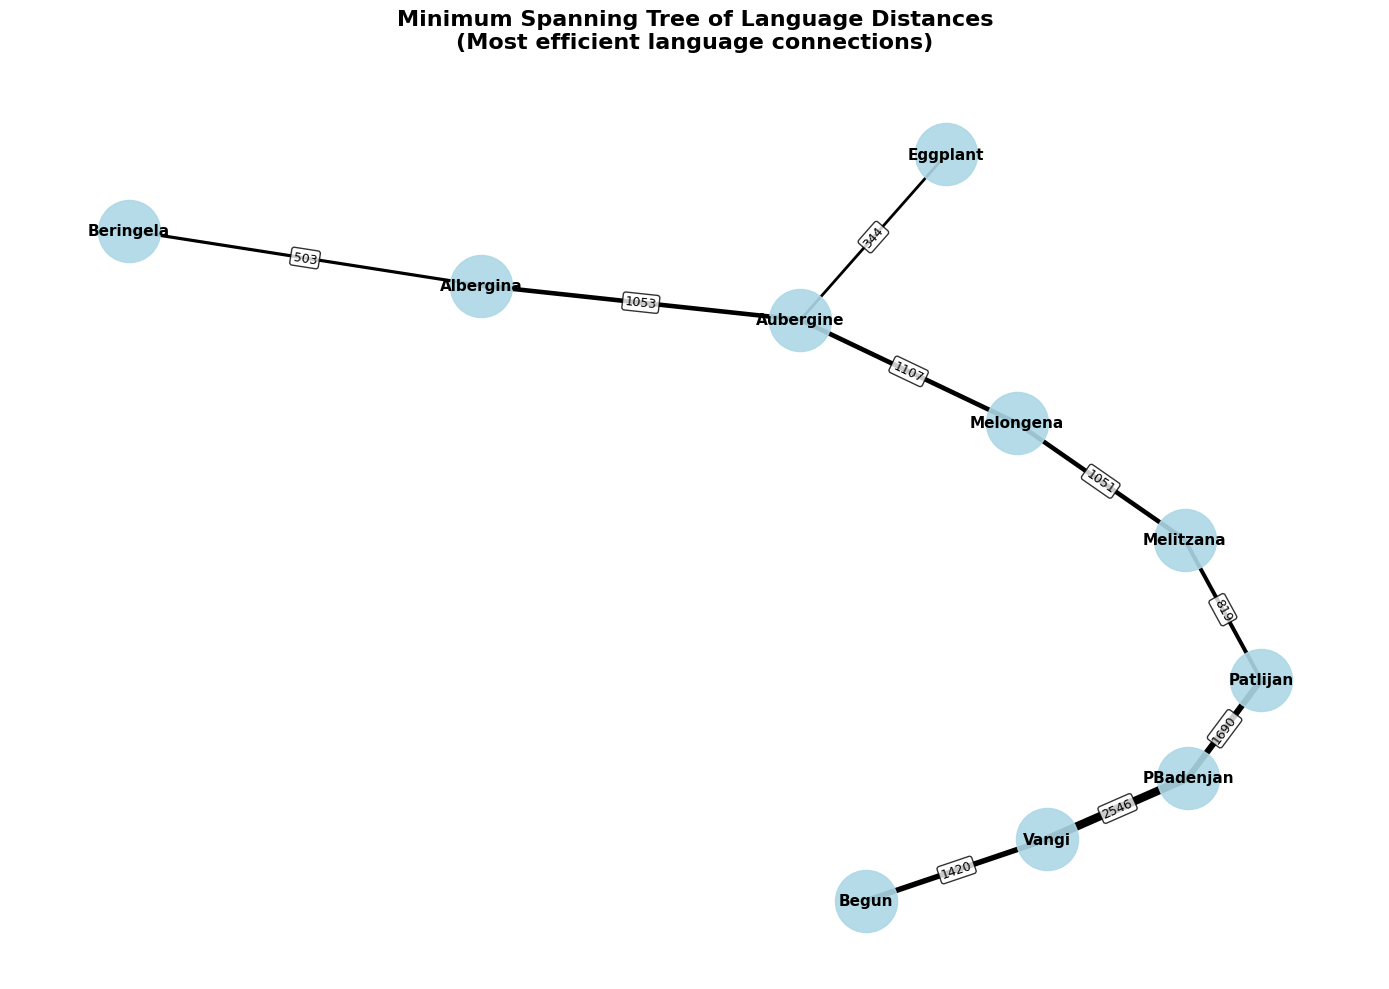

In [99]:
### DO: Create the distance matrix and MST of the edit distances.  
### Compare to the distance matrix and MST of at least the geographical distances of the capitals. 

G = nx.Graph()
for name in L:
    G.add_node(name)

distance_matrix = {} # Optional: to store the matrix for inspection
for i in range(len(L)):
    distance_matrix[L[i]] = {}
    for j in range(i + 1, len(L)): # Iterate through unique pairs
        name1 = L[i]
        name2 = L[j]
        distance = lev_rec(name1, name2)
        G.add_edge(name1, name2, weight=distance)
        distance_matrix[name1][name2] = distance

header = " ".join([f"{name:<8}" for name in L])
print(f"{'':<10} {header}")
for i, name1 in enumerate(L):
    row_str = f"{name1:<10}"
    for j, name2 in enumerate(L):
        if i == j:
            row_str += f"{0:<10}"
        elif j > i:
            row_str += f"{distance_matrix[name1][name2]:<10}"
        else:
            row_str += f"{distance_matrix[name2][name1]:<10}"
    print(row_str)

mst = nx.minimum_spanning_tree(G, weight='weight')

pos = nx.spring_layout(mst, seed=42) # positions for all nodes
nx.draw_networkx_nodes(mst, pos, node_size=1000)
nx.draw_networkx_edges(mst, pos, width=2)
nx.draw_networkx_labels(mst, pos, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title("Minimum Spanning Tree of Eggplant Names (Levenshtein Distance)")
plt.axis('off')
plt.show()

languages = [
    'PBadenjan', 'Vangi', 'Begun', 'Beringela', 'Eggplant', 
    'Albergina', 'Melitzana', 'Melongena', 'Patlijan', 'Aubergine'
]

# Distance matrix data
distance_data = [
    [0.00, 2545.65, 3961.33, 5272.75, 4410.22, 4774.13, 2466.02, 3409.99, 1690.29, 4208.79],
    [2545.65, 0.00, 1420.22, 7776.40, 6744.91, 7273.70, 5009.35, 5916.20, 4216.99, 6587.71],
    [3961.33, 1420.22, 0.00, 9151.35, 8116.71, 8648.20, 6419.66, 7300.89, 5619.34, 7903.79],
    [5272.75, 7776.40, 9151.35, 0.00, 1587.49, 503.20, 2852.54, 1863.79, 3582.85, 1453.07],
    [4410.22, 6744.91, 8116.71, 1587.49, 0.00, 1146.46, 2390.69, 1433.80, 2772.37, 343.83],
    [4774.13, 7273.70, 8648.20, 503.20, 1146.46, 0.00, 2369.54, 1364.14, 3085.22, 1053.17],
    [2466.02, 5009.35, 6419.66, 2852.54, 2390.69, 2369.54, 0.00, 1050.86, 818.76, 2097.59],
    [3409.99, 5916.20, 7300.89, 1863.79, 1433.80, 1364.14, 1050.86, 0.00, 1721.59, 1107.06],
    [1690.29, 4216.99, 5619.34, 3582.85, 2772.37, 3085.22, 818.76, 1721.59, 0.00, 2599.66],
    [4208.79, 6587.71, 7903.79, 1453.07, 343.83, 1053.17, 2097.59, 1107.06, 2599.66, 0.00]
]

# Convert to numpy array
distance_matrix = np.array(distance_data)

def create_capital_mst_visualization():
    """Create and visualize the Minimum Spanning Tree"""
    
    # Create MST using scipy
    mst_matrix = minimum_spanning_tree(distance_matrix).toarray()
    
    # Create MST graph
    mst_G = nx.Graph()
    for i in range(len(languages)):
        mst_G.add_node(i, label=languages[i])
    
    # Add MST edges
    mst_edges = []
    for i in range(len(languages)):
        for j in range(len(languages)):
            if mst_matrix[i][j] > 0:
                mst_G.add_edge(i, j, weight=mst_matrix[i][j])
                mst_edges.append((i, j, mst_matrix[i][j]))
    
    # Create visualization
    plt.figure(figsize=(14, 10))
    
    # Use spring layout for better visualization
    pos = nx.spring_layout(mst_G, k=3, iterations=50, seed=42)
    
    # Get edge weights for styling
    edges = mst_G.edges()
    weights = [mst_G[u][v]['weight'] for u, v in edges]
    
    # Normalize weights for edge width visualization
    max_weight = max(weights)
    min_weight = min(weights)
    edge_widths = [2 + 4 * (w - min_weight) / (max_weight - min_weight) for w in weights]
    
    # Color edges based on weight (red = high distance, green = low distance)
    edge_colors = plt.cm.RdYlGn_r([(w - min_weight) / (max_weight - min_weight) for w in weights])
    
    # Draw MST edges with weights
    nx.draw_networkx_edges(mst_G, pos, edge_color='black', 
                          width=edge_widths)
    
    # Draw nodes
    nx.draw_networkx_nodes(mst_G, pos, node_color='lightblue', 
                          node_size=2000, alpha=0.9)
    
    # Draw labels
    nx.draw_networkx_labels(mst_G, pos,
                           labels={i: languages[i] for i in range(len(languages))},
                           font_size=11, font_weight='bold')
    
    # Add edge labels with distances
    edge_labels = {(u, v): f'{mst_G[u][v]["weight"]:.0f}' for u, v in mst_G.edges()}
    nx.draw_networkx_edge_labels(mst_G, pos, edge_labels, font_size=9, 
                                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
    
    plt.title('Minimum Spanning Tree of Language Distances\n(Most efficient language connections)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

create_capital_mst_visualization()